In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('../')
os.environ['CUDA_VISIBLE_DEVICES'] = '1,3'

import sys
sys.path.append("Marigold")

import jhutil; jhutil.jhprint(1111, )

1111 


In [2]:
import torch

def get_cached_data(data_path):
    data = torch.load(data_path)
    
    image = data["image"]
    depth_gt = data["gt"].squeeze()
    depth_gt_sparse = data["dep"].squeeze()
    depth_pred = data["depth_pred"]
    
    return image, depth_gt, depth_gt_sparse, depth_pred

data_path = "/data2/wlsgur4011/SparseDC/datas/cache_prev/1.marigold(vanilla)_0f46ecad380de3e24d0689d19c70765b.pt"
image, depth_gt, depth_gt_sparse, depth_pred = get_cached_data(data_path)

## EDA

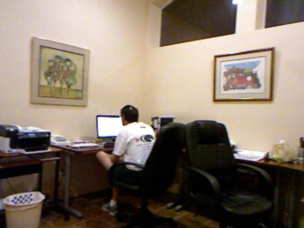

In [3]:
image

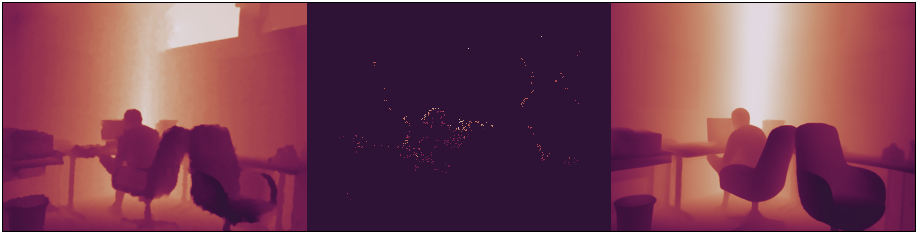

In [4]:
from jhutil import show_depth_all

show_depth_all(depth_gt, depth_gt_sparse, depth_pred)

In [1]:
from src.utils.depth_utils import get_depth_affine, get_depth_dbscan
from src.utils.depth_utils import *


def compare_dbscan_and_affine(depth_gt, depth_gt_sparse, depth_pred):
    mask_sparse = depth_gt_sparse != 0
    
    depth_dbscan, dbscan_mask = get_depth_dbscan(depth_pred, depth_gt_sparse)
    depth_affine = get_depth_affine(depth_pred, depth_gt_sparse)
    
    diff_dbscan = (depth_dbscan - depth_gt) * dbscan_mask
    diff_affine = (depth_affine - depth_gt) * dbscan_mask
    
    err_dbscan = diff_dbscan.abs().mean()
    err_affine = diff_affine.abs().mean()
    visualization = torch.concat([dbscan_mask, diff_dbscan, diff_affine], dim=1).chans
    
    return err_dbscan, err_affine, visualization

err_dbscan, err_affine, visualization = compare_dbscan_and_affine(depth_gt, depth_gt_sparse, depth_pred)

import jhutil; jhutil.jhprint(1111, err_dbscan)
import jhutil; jhutil.jhprint(2222, err_affine)
visualization

ModuleNotFoundError: No module named 'src'

## Calculate multiple

In [13]:
import numpy as np
data_folder = "/data2/wlsgur4011/SparseDC/datas/cache_prev"
data_path_iter = iter(os.listdir(data_folder))

1111  "tensor cuda:0 0.122"
2222  "tensor cuda:0 0.083"


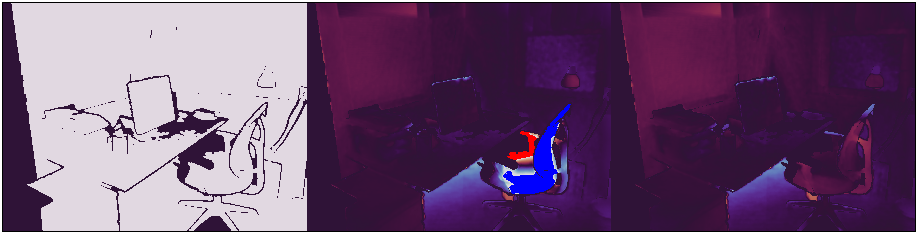

In [18]:

while True:
    data_path = os.path.join(data_folder, next(data_path_iter))
    image, depth_gt, depth_gt_sparse, depth_pred = get_cached_data(data_path)
    err_dbscan, err_affine, visualization = compare_dbscan_and_affine(depth_gt, depth_gt_sparse, depth_pred)
    import jhutil; jhutil.jhprint(1111, err_dbscan)
    import jhutil; jhutil.jhprint(2222, err_affine)
    break
visualization